# **Introduction**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('multidim_data_trainval.npy', allow_pickle = True).item()

In [2]:
list(data)

Y_train = list(data.values())[0]
X_train = list(data.values())[1]
Y_test = list(data.values())[2]
X_test = list(data.values())[3]

# **Part b)**

*1)*

In [3]:
#provided_functions.py

def Lasso(Phi, Y, lmbd):
    ''' compute weight of linear regression with Lasso

    Phi: design matrix n x d
    Y: true values n x 1
    lmbd: weight of regularization

    output: weights of linear regression d x 1
    '''

    # initialize wplus, wminus
    wplus = np.random.rand(Phi.shape[1], 1) # generate Phi.shape[1] random numbers
    wminus = np.random.rand(*wplus.shape) # generate same number of random numbers as for wplus

    loss = LassoObjective(wplus, wminus, Phi, Y, lmbd)

    counter = 1
    while counter > 0:
        # compute gradients wrt wplus and wminus
        gradwplus, gradwminus = GradLassoObjective(wplus, wminus, Phi, Y, lmbd)

        # compute new iterates
        wplus, wminus, loss = getStepSize(wplus, wminus, Phi, Y, lmbd, gradwplus, gradwminus, loss)

        if (counter % 100) == 0: # only generate output each 100 iterations
            # check if stopping criterion is met
            wnew = wplus - wminus
            ind = wnew != 0. # indicates nonzero weights
            indz = wnew == 0.
            r = 2 / Phi.shape[0] * (Phi.T @ (Phi @ wnew - Y))
            stop = np.abs(r[ind] + lmbd * np.sign(wnew[ind])).sum() + (np.abs(r[indz]) - lmbd * np.ones_like(
                r[indz])).clip(0.).sum()
            print('iter={} current objective={:.3f} nonzero weights={}'.format(
                counter, loss, ind.sum()) +\
                ' stop={:.5f}'.format(stop / Phi.shape[0]))
            if np.abs(stop) / Phi.shape[0] < 1e-5: # stopping criterion
                break
        counter += 1


    return wplus - wminus


############################################################


def LassoObjective(wplus, wminus, Phi, Y, lmbd):
    ''' evaluates the objective function at (wplus, wminus)
    L2 loss + L1 regularization
    '''
    w = wplus - wminus
    return ((Phi @ w - Y) ** 2).mean() + lmbd * np.abs(w).sum()



def GradLassoObjective(wplus, wminus, Phi, Y, lmbd):
    ''' computes the gradients of the objective function
    at (wplus, wminus)
    gradwplus: gradient wrt wplus
    gradwminus: gradient wrt minus

    for the derivation of the respective gradient, please refer to the pdf (part b.1)
    '''
 
    gradwplus = (2/Phi.shape[0]) * Phi.T @ (- Y + Phi @ wplus - Phi @ wminus) + np.ones((Phi.shape[1], 1)) * lmbd
    gradwminus = (2/Phi.shape[0]) * Phi.T @ (Y - Phi @ wplus + Phi @ wminus) + np.ones((Phi.shape[1], 1)) * lmbd     

    return gradwplus, gradwminus



def ProjectionPositiveOrthant(x):
    ''' returns the projection of x onto the positive orthant such that it is element of convex set

    for the derivation of the analytical expression of the projection, please refer to the pdf (part a.2): y_i = max{0, x_i}
    '''
    
    y = np.where(x < 0, 0, x) 
    return y



def getStepSize(wplus, wminus, Phi, Y, lmbd, gradwplus, gradwminus, loss):
    ''' performs one step of projected gradient descent (i.e.
    compute next iterate) with step size selection via
    backtracking line search

    input
    loss: objective function at current iterate (wplus, wminus)

    output
    wplusnew, wminusnew: next iterates wplus_{t+1}, wminus_{t+1}
    lossnew: objective function at the new iterate
    '''

    alpha, beta, sigma = 1., .1, .1 # initialize parameters
    wplusnew, wminusnew = wplus.copy(), wminus.copy() # create copies
    lossnew = np.float('Inf') # make sure to enter the loop

    # choose the step size alpha with backtracking line search
    while lossnew > loss + sigma * ((gradwplus * (wplusnew - wplus)).sum() + (gradwminus * (wminusnew - wminus)).sum()):

        # get new step size to test (decreasing with each step)
        alpha *= beta

        # projected gradient step for wplus and wminus with step size alpha
        # i.e. compute x_{t+1} as in the text
        wplusnew = ProjectionPositiveOrthant(wplus - alpha*gradwplus)
        wminusnew = ProjectionPositiveOrthant(wminus - alpha*gradwminus)

        # compute new value of the objective
        lossnew = LassoObjective(wplusnew, wminusnew, Phi, Y, lmbd)

    return wplusnew, wminusnew, lossnew

*2)*

In [4]:
# scale training and test data by the mean and standard deviations in the training data set

means = np.mean(X_train, axis = 0)
stds = np.std(X_train, axis = 0)

X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

In [5]:
# add offset parameter as feature by adding a column of ones

X_train_offset = np.c_[ X_train_scaled, np.ones(X_train_scaled.shape[0]) ]
X_test_offset = np.c_[ X_test_scaled, np.ones(X_test_scaled.shape[0]) ]

In [6]:
# run Lasso implementation

w = Lasso(X_train_offset, Y_train, 10)

iter=100 current objective=139276.556 nonzero weights=53 stop=0.12160
iter=200 current objective=138924.624 nonzero weights=47 stop=0.04654
iter=300 current objective=138832.739 nonzero weights=44 stop=0.00568
iter=400 current objective=138786.721 nonzero weights=43 stop=0.00400
iter=500 current objective=138758.189 nonzero weights=43 stop=0.00305
iter=600 current objective=138738.643 nonzero weights=42 stop=0.00240
iter=700 current objective=138724.476 nonzero weights=42 stop=0.00194
iter=800 current objective=138716.255 nonzero weights=41 stop=0.00125
iter=900 current objective=138714.444 nonzero weights=41 stop=0.00078
iter=1000 current objective=138713.816 nonzero weights=40 stop=0.00048
iter=1100 current objective=138713.590 nonzero weights=40 stop=0.00030
iter=1200 current objective=138713.507 nonzero weights=40 stop=0.00018
iter=1300 current objective=138713.476 nonzero weights=40 stop=0.00011
iter=1400 current objective=138713.464 nonzero weights=40 stop=0.00007
iter=1500 curre

In [7]:
# i. compute and report training and test loss

training_loss = ((X_train_offset @ w - Y_train) ** 2).mean()
test_loss = ((X_test_offset @ w - Y_test) ** 2).mean()

print('Training loss = {:.5f} \nTest loss = {:.5f}'.format(training_loss, test_loss))

Training loss = 121332.09637 
Test loss = 153261.52154


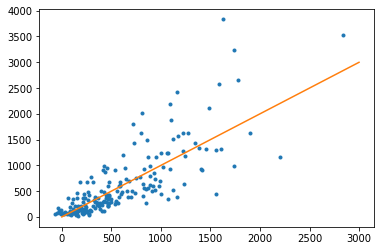

In [8]:
# ii. plot predicted vs. true values for test set

plt.plot(X_test_offset @ w, Y_test, '.')
plt.plot(range(0, 3000), range(0, 3000))
plt.show()

Here, one can observe our model (x-axis) also predicts a negative output in seven cases which is not reasonable since this denotes the number of violent crimes per 100K population. This might be the case because 22 out of the 100 weights are negative.

In addition, it can be seen that our model finds a good balance between under- and overestimating the output. Also, it works very well for small outputs but as the output grows, the deviation from the true output increases.

In [9]:
print(np.sum(np.array(w) < 0))
print(np.sum(X_test_offset @ w < 0))

22
7


*3)*

In [10]:
def BasisFunction(X):
  ''' 
  function to convert the original features into the design matrix using 
  basis functions: X ** 2 
  - this basis function is chosen because we have seen in the plot that the
  model has difficulties predict larger outputs

  input: original features (n*100)
  output design matrix (n*200)
  '''

  X_design = np.c_[ X, X ** 2 ]

  return X_design



def train_model():
  '''
  - function to train the model based on the normalized training data with offset 
  parameters
  - the optimal regularization parameter lambda is determined via cross-validation
  using the test data as the validation data
  - the function returns the optimal weights and the means and standard deviations
  used for scaling
  '''

  np.random.seed(2) # to ensure replicable results

  means = np.mean(X_train, axis = 0)
  stds = np.std(X_train, axis = 0)

  X_train_scaled = (X_train - means) / stds
  X_test_scaled = (X_test - means) / stds

  X_train_basis = BasisFunction(X_train_scaled)
  X_test_basis = BasisFunction(X_test_scaled)

  X_train_offset = np.c_[ X_train_basis, np.ones(X_train_basis.shape[0]) ]
  X_test_offset = np.c_[ X_test_basis, np.ones(X_test_basis.shape[0]) ]

  # determine lambda via cross-validation 
  # note: the range of labmda is already pre-selected by initial 
  # cross-validations to reduce the runtime
  min_lmbda = 95
  max_lmbda = 99
  range_lbmda = [i for i in range(min_lmbda, max_lmbda)]
  test_loss = np.zeros(len(range_lbmda))
  w_test = list()
  c = 0

  for l in range_lbmda:
    print('\nFor lmbda = {}:'.format(l))
    w_test.append(Lasso(X_train_offset, Y_train, l))
    test_loss[c] = ((X_test_offset @ w_test - Y_test) ** 2).mean()
    c += 1

  ind = np.argmin(test_loss)
  w = w_test[ind]
  print('\nBest lambda via cross-validation: lmbda = {}'.format(range_lbmda[ind]))
  return w, means, stds



def Prediction(X):
  '''
  function to predict the output for a set of testpoints X
  - first, the model is trained via train_model()
  - second, the matrix X is prepared using scaling and our defintion of the design
  matrix
  - third, the predictions are returned
  '''

  w, means_train, stds_train = train_model()

  X_scaled = (X - means_train) / stds_train
  X_basis = BasisFunction(X_scaled)
  X_basis_offset = np.c_[ X_basis, np.ones(X_basis.shape[0]) ]

  pred = X_basis_offset @ w

  return pred

In [11]:
# exemplary execution on test set (training duration: roughly 2 min)
predictions = Prediction(X_test)
print('\nTest loss = {:.5f}'.format(((predictions - Y_test) ** 2).mean()))


For lmbda = 95:
iter=100 current objective=274260.441 nonzero weights=145 stop=5.64593
iter=200 current objective=255974.879 nonzero weights=93 stop=3.53775
iter=300 current objective=244230.454 nonzero weights=70 stop=3.77705
iter=400 current objective=234270.253 nonzero weights=51 stop=0.29167
iter=500 current objective=228475.657 nonzero weights=41 stop=0.20160
iter=600 current objective=225782.463 nonzero weights=38 stop=0.10470
iter=700 current objective=224848.884 nonzero weights=33 stop=0.28002
iter=800 current objective=224484.251 nonzero weights=32 stop=0.03842
iter=900 current objective=224314.992 nonzero weights=31 stop=0.03941
iter=1000 current objective=224207.874 nonzero weights=29 stop=0.02061
iter=1100 current objective=224168.586 nonzero weights=29 stop=0.01131
iter=1200 current objective=224147.790 nonzero weights=29 stop=0.01472
iter=1300 current objective=224136.304 nonzero weights=28 stop=0.00554
iter=1400 current objective=224130.548 nonzero weights=27 stop=0.010